<a href="https://colab.research.google.com/github/NicholasChoong/natural-language-processing/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05

# Preprocessing

Text preprocessing is an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better. It is important to understand what each preprocessing method does in order to help decide if it is appropriate for your particular task.

## Text Wrangling

Text wrangling is converting/gathering/extracting formatted text from raw data. 

For example, **HTML** does not include only content text. Even when you extract only the text from **HTML**, it is not all meaningful (e.g. it can include advertisements).

Have a look at the [news article](https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html). We might be only interested in getting the headline and body of the article.

The following code removes some irrelevant tags (i.e. script, style, link, etc.) and displays the remaining tags. We will mainly utilise two packages: 


*   `urllib`: is a package that collects several modules for working with URLs. We will use `urllib.request` for opening and reading URLs (See details at [urllib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request)). 
*   `BeautifulSoup`: Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree (See details at [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)).


    


In [ ]:
import urllib 
from bs4 import BeautifulSoup

url = "https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# remove irrelevant tags (script, style, link, etc.)
for script in soup(["script", "style", "link", "head", "noscript"]):
    script.extract()    # rip it out, i.e remove the tag from the tree

# The get_text() returns all the human-readable text beneath the tag as string
text = soup.get_text()
#print(text) # you can uncomment to have a look the returned text

# The prettify() method will turn a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <body>
  <div id="app">
   <div aria-atomic="true" aria-live="off" class="_2O3rv" id="page_announcer" tabindex="-1">
    University of Sydney to move fully online while Macquarie cancels classes
   </div>
   <div>
   </div>
   <div class="_2lciU" role="">
    <svg aria-hidden="true" class="QMY9O idv27" focusable="false" height="1em" width="1em">
     <use xlink:href="#icon-exclamation">
     </use>
    </svg>
    <p>
     We’re sorry, this feature is currently unavailable. We’re working to restore it. Please try again later.
    </p>
    <button class="_760Mo">
     Dismiss
    </button>
   </div>
   <nav class="RbLp5">
    <a href="#sections">
     Skip to sections navigation
    </a>
    <a href="#content">
     Skip to content
    </a>
    <a href="#footer">
     Skip to footer
    </a>
   </nav>
   <header class="_21UZG noPrint" data-testid="header">
    <div class="_2L98J">
     <div class="_2gsJ0">
      <ul>
       <li class="PJUwX">
        <bu

**Try &lt;p&gt;  tag**

Using &lt;p&gt;  tag is a common way to extract the main contents of the online news articles. BUT, do not expect this always provides what you want.

In [ ]:
# The findAll() method returns all the specified tags, it is the same as find_all()
# Set text=True will return only the specified tags with the text inside, you can try to set text=False to compare the difference
p_tags = soup.findAll('p', text=True) 
for i, p_tag in enumerate(p_tags): 
    print(str(i) + str(p_tag))

0<p>We’re sorry, this feature is currently unavailable. We’re working to restore it. Please try again later.</p>
1<p>The University of Sydney will suspend all face-to-face teaching from Monday and move fully online while Macquarie University has cancelled classes altogether in order to make the digital transition, revealing one of its students tested positive for COVID-19.</p>
2<p>The University of Sydney's 10,000 staff members have been encouraged to work remotely to slow the spread of coronavirus, but the campus Wi-Fi network and facilities will remain open with enhanced cleaning protocols and social distancing measures.</p>
3<p>Courses with labs and practical components will be adapted for online or suspended until later in the semester while clinical placements for health students will go ahead under strict guidelines, Vice-Chancellor Michael Spence wrote to staff on Tuesday afternoon.</p>
4<p>"We’ve put a lot of effort and thought into how to do it. I think this is a tremendous op

<ipython-input-2-c12e857aa157>:3: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  p_tags = soup.findAll('p', text=True)


## Punctuation removal

First, let's try to remove punctuation by using an exhaustive list of symbols! 

In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x


text = "It's a nice day[]"
print(remove_punctuation(text))


Its a nice day


Alternatively, what about using regular expressions ([re package](https://docs.python.org/3/library/re.html))?

In [ ]:
import re

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x


text = "It's a nice day[]"

print(remove_punctuation_re(text))

Its a nice day


OK. Then what about emoticons?      **:)** or **:D** or **:(**  

Some tasks may want you to keep emoticons e.g. sentiment analysis on tweets.


In [ ]:
#you can find the solution from the TweetTokenizer https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer (search "EMOTICONS" in the page)
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

Have a look at some contractions of words! Contractions include punctuation - how would you handle them?


In [ ]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

## Stopwords removal
Stopwords are the most common words in any natural language. They tend to perform a structural role rather than semantic. So for the purpose of analysing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [ ]:
# You must be familiar with the following already since we've tried this in Lab 1
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

stop_words = sw.words()
filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Case-folding
How would you handle case? A common strategy is to do case-folding by reducing all letters to lower case

In [ ]:
text = "Hello there!"
#Returns the result of converting all characters in text to lowercase.
print(text.lower())


#do we need to reduce all letters to lower case?
text2 = "I love University of Sydney :D"
print(text2.lower())

hello there!
i love university of sydney :d


## Stemming
Stemming is a process of removing and replacing word suffixes to arrive at a common root form of the word.

*   Try various types of NLTK stemmer in [demo](http://text-processing.com/demo/stem/)
*   A comparative study of stemming algorithms: [Paper Link](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)


In [ ]:
#let's try to test with porter algorithm
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


## Lemmatisation

Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form


In [ ]:
#by NLTK Wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


cat
cactus
goose
rock
python
good
best
run
run


## Tokenisation

Given a character sequence and a defined document unit (word, sentence etc.), tokenisation is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation

Try various types of NLTK Tokenizer in [demo](http://text-processing.com/demo/tokenize/). 

[NLTK Tokeniser API Doc](https://www.nltk.org/api/nltk.tokenize.html)

**TweetTokenizer: Twitter-aware tokeniser**

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


**TreebankWordTokenizer**

The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


# Word Cloud
*   [Word Cloud](https://amueller.github.io/word_cloud/index.html)
*   [Wikipedia Python](https://pypi.org/project/wikipedia/)


In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=cd3970b56147eb3990a735fdd559f0440f20fba2fa0990f2e2aec45b49a99e87
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


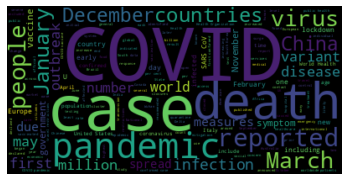

In [ ]:
from wordcloud import WordCloud
import wikipedia

# Getting wikipedia contents of "COVID-19_pandemic"
text = wikipedia.page("COVID-19_pandemic").content

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Try more word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

# Saving and Loading Models

Training a model takes time. Once it is trained it is useful to save it. Then when you, or someone else, wants to use it you can just reload it.

**Saving a Pytorch model**

In [ ]:
# Let's train a model first
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

no_of_epochs = 500
display_interval = 20
learning_rate=0.01

# training data
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float() 

model = TheModelClass()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_data_torch)
    loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
    loss.backward()
    optimizer.step()

    if epoch%display_interval == display_interval-1:
        print('Epoch: %d, loss: %.3f' %(epoch + 1, loss.item() ))

Epoch: 20, loss: 30.379
Epoch: 40, loss: 29.177
Epoch: 60, loss: 28.095
Epoch: 80, loss: 27.121
Epoch: 100, loss: 26.243
Epoch: 120, loss: 25.452
Epoch: 140, loss: 24.740
Epoch: 160, loss: 24.099
Epoch: 180, loss: 23.521
Epoch: 200, loss: 23.001
Epoch: 220, loss: 22.533
Epoch: 240, loss: 22.111
Epoch: 260, loss: 21.731
Epoch: 280, loss: 21.388
Epoch: 300, loss: 21.080
Epoch: 320, loss: 20.802
Epoch: 340, loss: 20.552
Epoch: 360, loss: 20.327
Epoch: 380, loss: 20.124
Epoch: 400, loss: 19.942
Epoch: 420, loss: 19.777
Epoch: 440, loss: 19.629
Epoch: 460, loss: 19.495
Epoch: 480, loss: 19.375
Epoch: 500, loss: 19.267


In [ ]:
# Now we save the trained model to the file named 'filename.pt', you can name it based upon your needs
torch.save(model, 'filename.pt')

**Loading model**

**IMPORTANT NOTE**: Before loading the saved PyTorch model by using *torch.load(model_file_name)*, you have to make sure you have already run the code for defining the model class (e.g. the *TheModelClass* in the above section for this sample code). You can try to restart the runtime and then directly load the model to see the error.

In [ ]:
#  Load the saved model from the .pt file
the_saved_model = torch.load('filename.pt')
the_saved_model.eval()

TheModelClass(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Use the loaded model to do prediction
prediction = the_saved_model(x_data_torch).detach().numpy()
for i in range(len(y_training)):
    print('X: %d, Y_true: %d, Y_predict: %.3f'%(x_training[i][0],y_training[i],prediction[i][0]))

X: 1, Y_true: 100, Y_predict: 99.809
X: 2, Y_true: 200, Y_predict: 199.694
X: 5, Y_true: 501, Y_predict: 499.348
X: 8, Y_true: 780, Y_predict: 799.001
X: 9, Y_true: 901, Y_predict: 898.886
X: 12, Y_true: 1201, Y_predict: 1198.539
X: 14, Y_true: 1399, Y_predict: 1398.308
X: 16, Y_true: 1598, Y_predict: 1598.078
X: 18, Y_true: 1800, Y_predict: 1797.847
X: 20, Y_true: 2000, Y_predict: 1997.616


**How to Save (Upload) the model to your Google Drive**

As we know, once the session disconnects in Colab, all the files will be lost. Don't worry, we can save our model file to Google Drive so that we can download and and use it across sessions. 

There are various ways to upload the files on Google Drive.

[This tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH) will guide you how to save the files on your Google Drive.

1.   Mounting Google Drive locally
2.   Create a new Drive file

And we've already experienced multiple times for downloading the files from Google Drive (Refer to the Download Dataset section in this Lab5).

#Build a simple user interface

When we have a well trained model ready to be used by others, it would be wonderful to have a friendly user interface instead of aking users to enter the input in the code fields. In colab, we can simply build up a user interface via the build-in ***Form Fields*** (Actually, we've already experienced the text fields in Lab1 E1 and different types of fieds in Lab2)

In this section, we will focus on practising how to build a simple user friendly interface for retrieving the most similar word for the query word from a trained Word2Vec model. Let's just use the Gensim Word2Vec CBOW model from Lab2.

## Train word embeddings via Gensim Word2Vec model

Download the corpus - TED scripts. NOTE: If you prefer to download the following file directly, you can access via this [link](https://drive.google.com/file/d/1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-/view?usp=share_link). 

In [ ]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml')  

In [ ]:
## Process and prepare the data for word2vec model training

import re
from lxml import etree 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec

targetXML=open('ted_en-20160408.xml', 'r')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)

# Tokenising the sentence to process it by using NLTK library
sent_text=[]
for parse_text in target_text.xpath('//content/text()'):
  # Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
  content_text = re.sub(r'\([^)]*\)', '', parse_text)
  sent_text.extend(sent_tokenize(content_text))

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(sentences[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doing', 'exactly', 'the', 'same']]


In [ ]:
# Train the Word2Vec embedding model - CBOW

wv_cbow_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)

## Simple user interface for the Gensim Word2Vec model

In [ ]:
#@title Semantic Synonym Dictionary
#@markdown Please input the word you want to find the synonym for in the following field:

#@markdown ---
Word = 'lucky'  #@param {type: "string"}

#@markdown ---

# Find the most similar word by using the word2vec gensim CBOW model we jsut trained above
try:
    similar_words=wv_cbow_model.wv.most_similar(Word)
    print("The semantic synonym for "+Word+" is: "+similar_words[0][0])
except:
    print("Unfortunately, the word you entered is not in our dictionary. Please try another one and good luck!")

The semantic synonym for lucky is: fortunate


# Lab 5 Exercise 
Please complete the following **question E1 and E2** for Lab 5 and check with your Tutor (Lab Facilitator) in the lab. 

**Submission Due**: Your Lab 6 (in Week 7)

**Submission Method**: Show your final code to your tutor during the Lab.

## E1. Preprocessing Practice (1 mark)
In this exercise, we will apply the series of preprocessing techniques learned above to a Large Movie Review Dataset named [IMDB](https://www.imdb.com/interfaces/), which contains the movie reviews for natural language processing or Text analytics. 

You are required to preprocess the train and test data. You need to complete the section we tagged as **'[complete this section][TO DO]'. PLEASE!!! PLEASE!!!! READ THE COMMENT IN EACH CODE BLOCK**







In [1]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Download Dataset

Download the corpus - IMDB data. NOTE: If you prefer to download the following file directly, you can access via this [link](https://drive.google.com/file/d/1vF3FqgBC1Y-RPefeVmY8zetdZG1jmHzT/view). 



In [2]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1vF3FqgBC1Y-RPefeVmY8zetdZG1jmHzT'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb.csv')

import pandas as pd
df = pd.read_csv("imdb.csv")
# The original IMDB data contains 25k review, here we only sample a subset of 4000 for simplicity
df_pick = df.sample(4000,random_state=24)

raw_text = df_pick["review"].tolist()
raw_label = df_pick["sentiment"].tolist()

from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(raw_text,raw_label,test_size=0.25,random_state=42)

### Preprocessing [Complete this section]

####**Case Folding**

In [3]:
text_train = [s.lower() for s in text_train]
text_test = [s.lower() for s in text_test]

####**Remove punctuations [Please complete this section]**

In [7]:
import requests_oauthlib

def remove_punctuation_re(x):
    # [TODO] Please complete this function
    x = re.sub(r'[^\w\s]','',x)
    return x
    
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]

####**Tokenization [Please complete this section]**

In [14]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# [TODO] Please complete the following code
text_train = [word_tokenize(s) for s in text_train]
text_test = [word_tokenize(s) for s in text_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


####**Remove stopwords [Please complete this section]**

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

text_train_ns=[]
for tokens in text_train:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)

text_test_ns=[]
for tokens in text_test:
    # [TODO] Please complete this code body 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_ns.append(filtered_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


####**Lemmatisation [Please complete this section]**

In [16]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)

text_test_le = []
for tokens in text_test_ns:
    # [TODO] Please complete this code body
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_test_le.append(lemma_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
print(text_train_le)

[['jack', 'london', 'life', 'colorful', 'dozen', 'film', 'different', 'aspect', 'sad', 'life', 'film', 'wartime', 'propaganda', 'put', 'attractive', 'part', 'characterbr', 'br', 'jack', 'london', 'barely', 'age', '40', 'died', 'wrote', 'story', 'wrote', 'knew', 'wrote', 'bringing', 'baggage', 'life', 'experience', 'experience', 'day', 'time', 'condemned', 'racism', 'world', 'london', 'big', 'believer', 'yellow', 'peril', 'called', 'back', 'daybr', 'br', 'third', 'film', 'cover', 'life', 'author', 'year', 'seaman', 'inspiration', 'wolf', 'yukon', 'miner', 'cabin', 'doubt', 'inspiration', 'call', 'wild', 'london', 'capture', 'spirit', 'adventure', 'life', 'paper', 'world', 'enjoy', 'sincebr', 'br', 'final', 'dealt', 'time', 'correspondent', 'covering', 'russojapanese', 'london', 'socialist', 'socialism', 'encompass', 'folk', 'oriental', 'million', 'rising', 'immigration', 'chinese', 'japanese', 'pacific', 'coast', 'threat', 'job', 'white', 'advocated', 'strict', 'immigration', 'policy', 

## E2. Model Saving and Loading (1 mark)

In thise, let's try to practice how to save our own trained model and load it for later predictions. For convenience, we will directly use the Bi-RNN Text Classification model from Lab04 E1 as it is and only focus on the model saving and loading. You need to first run the provided modeling code below and then complete the section we tagged as **'[complete this section][TO DO]'. **

### Downloading dataset

Download the data files. NOTE: If you prefer to download the following files directly, you can access via this following links:

*   [embedded_docs.pkl](https://drive.google.com/file/d/1pXgfCrLTGQbJsm5fcJYbaIZXwxtWwTeV/view?usp=share_link)
*   [labels.pkl](https://drive.google.com/file/d/1kGZpz65Y-Gd4eOsL-EFNz08bgIus22JW/view?usp=share_link) 



In [17]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1pXgfCrLTGQbJsm5fcJYbaIZXwxtWwTeV'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('embedded_docs.pkl')  

id = '1kGZpz65Y-Gd4eOsL-EFNz08bgIus22JW'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('labels.pkl')  

import pickle
input_embeddings = pickle.load(open("embedded_docs.pkl","rb"))
label = pickle.load(open("labels.pkl","rb"))

### Split the dataset

In [18]:
# Split into training and testing dataset using scikit-learn
# For more details, you can refer to: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train_embeddings, test_embeddings, train_label, test_label = train_test_split(input_embeddings,label,test_size = 0.2, random_state=0)

# The processed data has the shape of (data_size, sequence_length, embedding_dimension)
print(train_embeddings.shape)
print(train_label.shape)

(2273, 512, 50)
(2273,)


### Modeling

In [19]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
import numpy as np
import torch.optim as optim

# Category labels, for decoding the predicted index to the actual labels
# Note that we only have the following 5 selected category labels in our data (See the Extention section for details)
categories = ['alt.atheism', 'comp.graphics', 'misc.forsale', 'sci.med', 'soc.religion.christian']

# The length of each sequence
seq_length = train_embeddings.shape[1]
# The input feature dimension
n_input = train_embeddings.shape[2]
# The number of class
n_class = np.unique(label).shape[0]

# Set the hyperparameters 
n_hidden = 200
batch_size = 256
total_epoch = 20
learning_rate = 1e-3

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()
        # set the bidirectional to True
        self.rnn = nn.RNN(n_input, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(2*n_hidden,n_class)

    def forward(self, x):        
        x, h_n = self.rnn(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)
        return output

In [22]:
from sklearn.metrics import accuracy_score

# Initialize model, set up the loss calculator and optimizer
model = Bi_RNN_Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,train_embeddings.shape[0],batch_size):
        input_batch = train_embeddings[ind:min(ind+batch_size, train_embeddings.shape[0])]
        target_batch = train_label[ind:min(ind+batch_size, train_embeddings.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f'%(epoch + 1, train_loss))

print('Finished Training')


Epoch: 1, train loss: 14.10311
Epoch: 2, train loss: 13.19575
Epoch: 3, train loss: 12.37538
Epoch: 4, train loss: 11.43188
Epoch: 5, train loss: 10.66216
Epoch: 6, train loss: 9.87921
Epoch: 7, train loss: 9.40594
Epoch: 8, train loss: 9.32834
Epoch: 9, train loss: 8.36598
Epoch: 10, train loss: 8.00889
Epoch: 11, train loss: 7.76194
Epoch: 12, train loss: 7.00152
Epoch: 13, train loss: 8.39970
Epoch: 14, train loss: 8.63619
Epoch: 15, train loss: 7.82898
Epoch: 16, train loss: 6.58724
Epoch: 17, train loss: 6.25629
Epoch: 18, train loss: 6.09000
Epoch: 19, train loss: 6.90126
Epoch: 20, train loss: 5.77092
Finished Training


### Save and Load the model [Complete this section]

**Save the model [Complete this part]**

In [24]:
# [TODO] Please write your code for saving the model below
# Hint: You need to make sure the model file saved can be successfully loaded in the next section.

torch.save(model, 'lab5.pt')

**Load the model**

In [25]:
model2 = torch.load('lab5.pt')
model2.eval()

Bi_RNN_Model(
  (rnn): RNN(50, 200, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=400, out_features=5, bias=True)
)

### Testing

In [27]:
## Prediction
outputs = model2(torch.from_numpy(test_embeddings).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
# More details can be found from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(
    classification_report([categories[i] for i in test_label], 
                          [categories[i] for i in predicted.cpu().numpy()], 
                          digits=4))

                        precision    recall  f1-score   support

           alt.atheism     0.5846    0.7600    0.6609       100
         comp.graphics     0.6264    0.4790    0.5429       119
          misc.forsale     0.6222    0.5045    0.5572       111
               sci.med     0.7333    0.6929    0.7126       127
soc.religion.christian     0.6667    0.8214    0.7360       112

              accuracy                         0.6485       569
             macro avg     0.6466    0.6516    0.6419       569
          weighted avg     0.6500    0.6485    0.6423       569

